import pandas for data analysis,
import seaborn for heat map plot,
import matplotlib for plotting

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as yy
from matplotlib import dates as pm
yy.use("ggplot")

read the file and show last five rows

In [5]:
data=pd.read_csv("weather.csv")
data.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
8644,31-Dec-2020,19:00,12,6.0,↑,77,1018,6.0,NaN
8645,31-Dec-2020,20:00,11,0.0,↑,77,1018,6.0,NaN
8646,31-Dec-2020,21:00,11,0.0,↑,77,1019,6.0,NaN
8647,31-Dec-2020,22:00,10,6.0,↑,82,1019,6.0,NaN
8648,31-Dec-2020,23:00,9,0.0,↑,87,1019,6.0,NaN


show a quick describtion of the data

In [6]:
data.describe()

,temp,wspeed,humidity,pressure,visibility,Unnamed: 8
count,8649.000000,8639.000000,8649.000000,8649.000000,8398.000000,0.0
mean,18.910510,9.992939,55.142444,1015.231819,6.512384,NaN
std,8.679571,8.765068,24.148943,4.471518,3.297092,NaN
min,0.000000,0.000000,3.000000,1000.000000,0.000000,NaN
25%,11.000000,0.000000,35.000000,1012.000000,5.000000,NaN
50%,19.000000,9.000000,55.000000,1015.000000,6.000000,NaN
75%,26.000000,15.000000,77.000000,1018.000000,7.000000,NaN
max,42.000000,74.000000,100.000000,1030.000000,16.000000,NaN


In [7]:
data=data.drop("Unnamed: 8",axis=1)

convert date column datatype from object to datetime

In [8]:
data.date=pd.to_datetime(data.date)

remove minutes from time column

In [9]:
data.time=data.time.str.replace(r":.*",":00",regex=True)

new dataframe contains only the data for January

In [10]:
# jan=data[data.date.str.contains("Jan")]
jan=data[data.date.dt.month==1]
jan.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility
761,2020-01-31,19:00,7,26.0,↑,61,1017,6.0
762,2020-01-31,20:00,7,32.0,↑,71,1017,6.0
763,2020-01-31,21:00,7,32.0,↑,61,1018,6.0
764,2020-01-31,22:00,7,33.0,↑,61,1018,7.0
765,2020-01-31,23:00,6,24.0,↑,66,1018,7.0


heatmap showing the temperature at all times during January

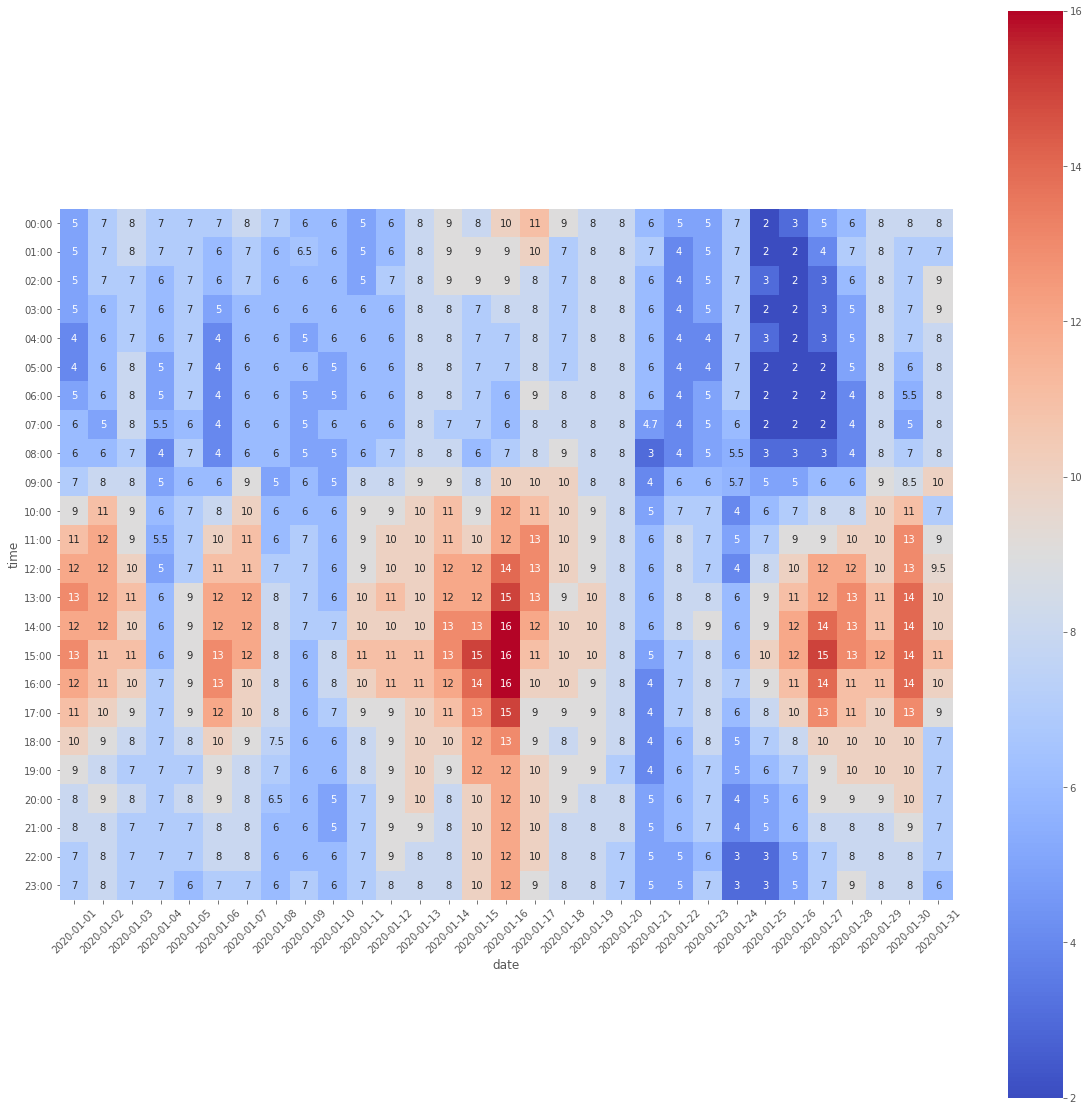

In [11]:
pivot_i=(jan.pivot_table(index="time",columns=jan.date.dt.date,values="temp"))
# # fill missing values
pivot_i.fillna(method="bfill",inplace=True)
fig,ax=plt.subplots(figsize=(20,20))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

histogram plot of hourly temperatures all year round and january contribution

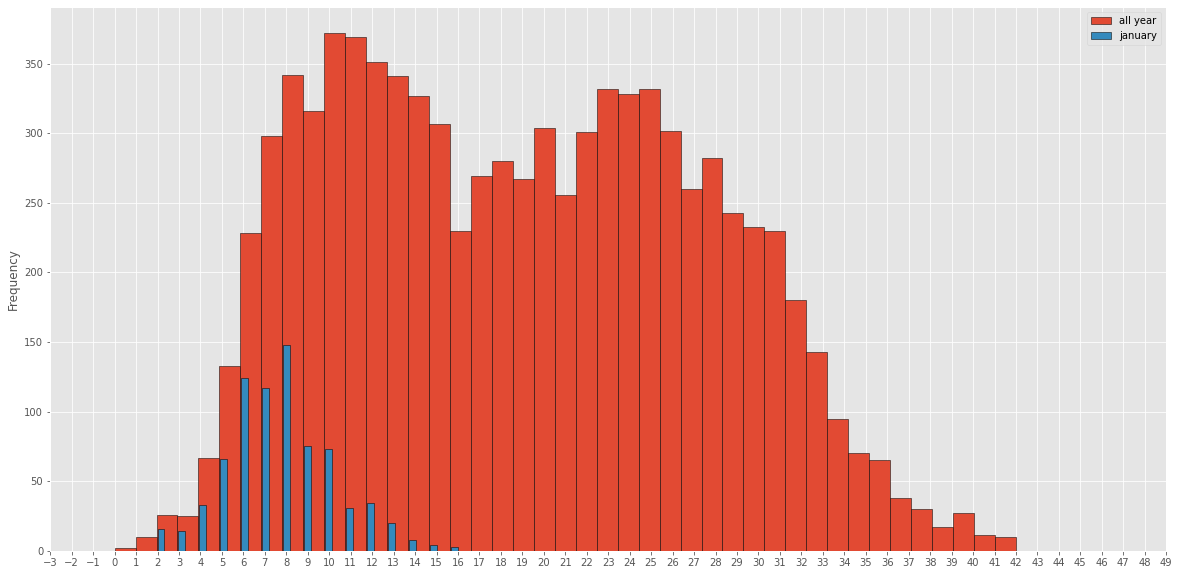

In [12]:
data.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="all year")
jan.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="january")
plt.xticks(range(-3,50))
plt.legend()

minimum, maximum and mean temperatures for each day during January

NameError: name 'dd' is not defined

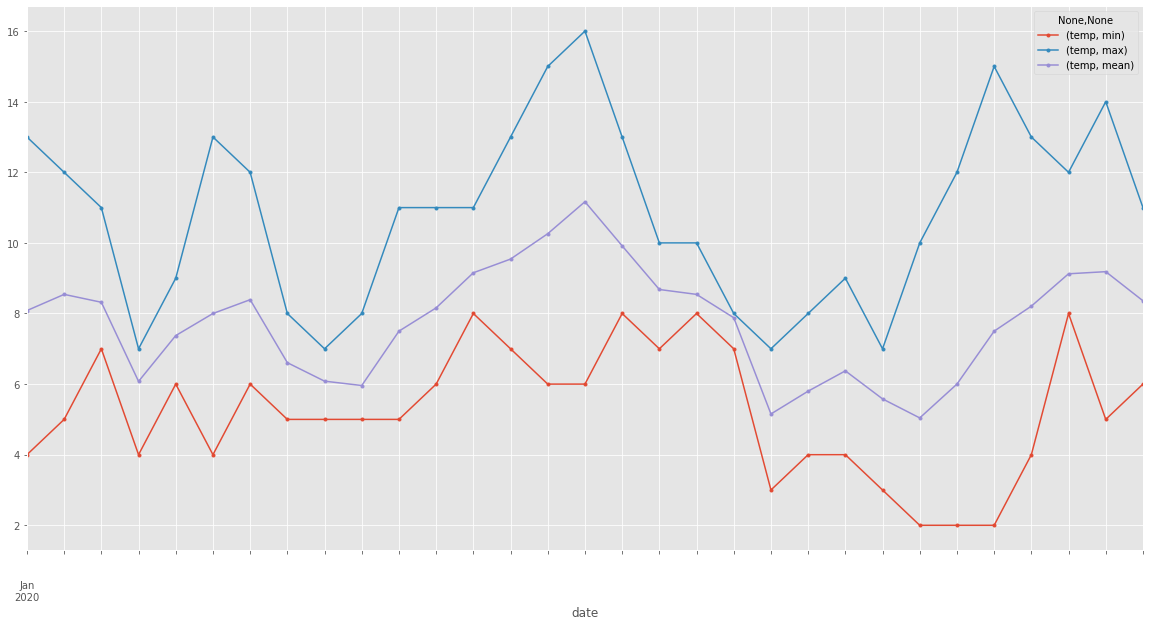

In [14]:
jan.groupby("date").agg({"temp":["min","max","mean"]}).plot(figsize=(20,10),marker=".")
plt.xticks(pd.date_range(start=("2020-1-1"),end=("2020-1-31")))
plt.xlim([dd.datetime(2019,12,31),dd.datetime(2020,2,1)])
dataf=pm.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(dataf)
plt.yticks(range(17))
plt.xlabel("Jan, 2020")
plt.ylabel("temp")
plt.legend()

## ..............................................................................................
correlation map which shows a positive relationship between (temperature, visibility),(pressure, humidity) and a negative relastionship between (temperature, humidity),(temperature, pressure)

<AxesSubplot:>

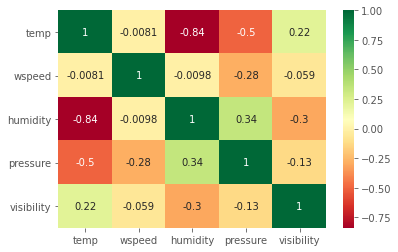

In [15]:
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

scale down the pressure for better visuals

In [16]:
data.pressure=data.pressure-1000

subplots for positive and negative correlations on a monthly basis. humidity and temperature have a perfect inverse relationship

<AxesSubplot:xlabel='date'>

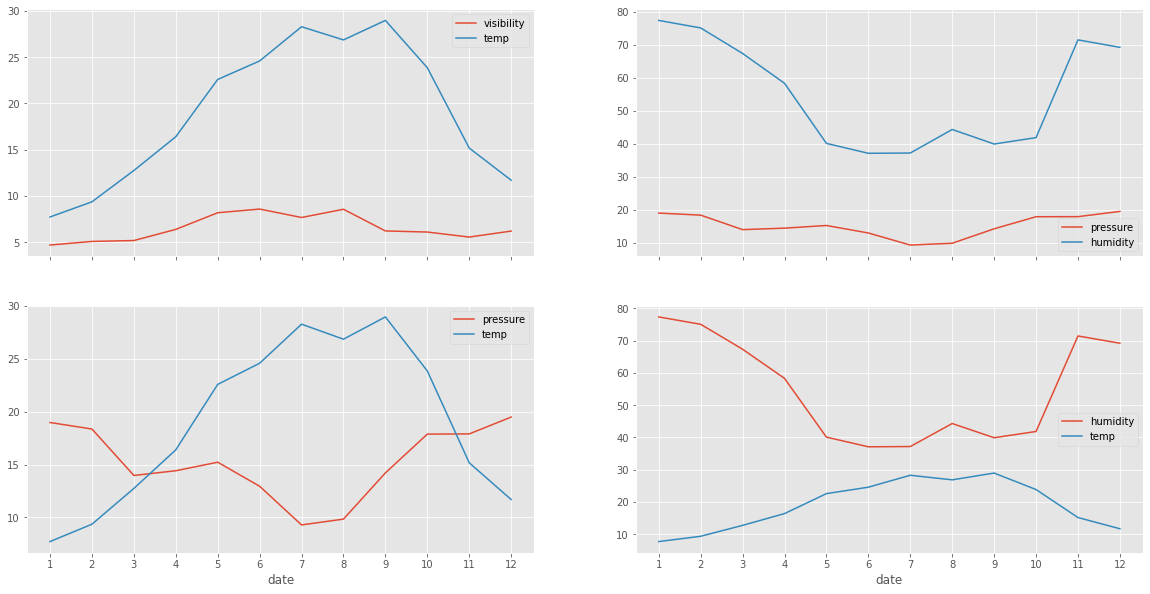

In [17]:
fig, axes= plt.subplots(2,2,sharex=True,figsize=(20,10))
plt.xticks(range(0,13))
group=data.groupby(data.date.dt.month).mean()
group[["visibility","temp"]].plot(ax=axes[0,0])
group[["pressure","humidity"]].plot(ax=axes[0,1])
group[["pressure","temp"]].plot(ax=axes[1,0])
group[["humidity","temp"]].plot(ax=axes[1,1])

seasonal charts

<AxesSubplot:>

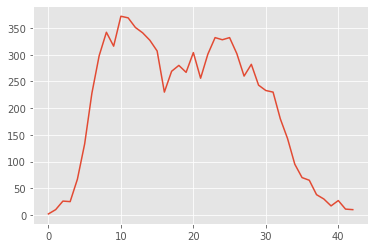

In [18]:
data.temp.value_counts().sort_index().plot()

<AxesSubplot:xlabel='date'>

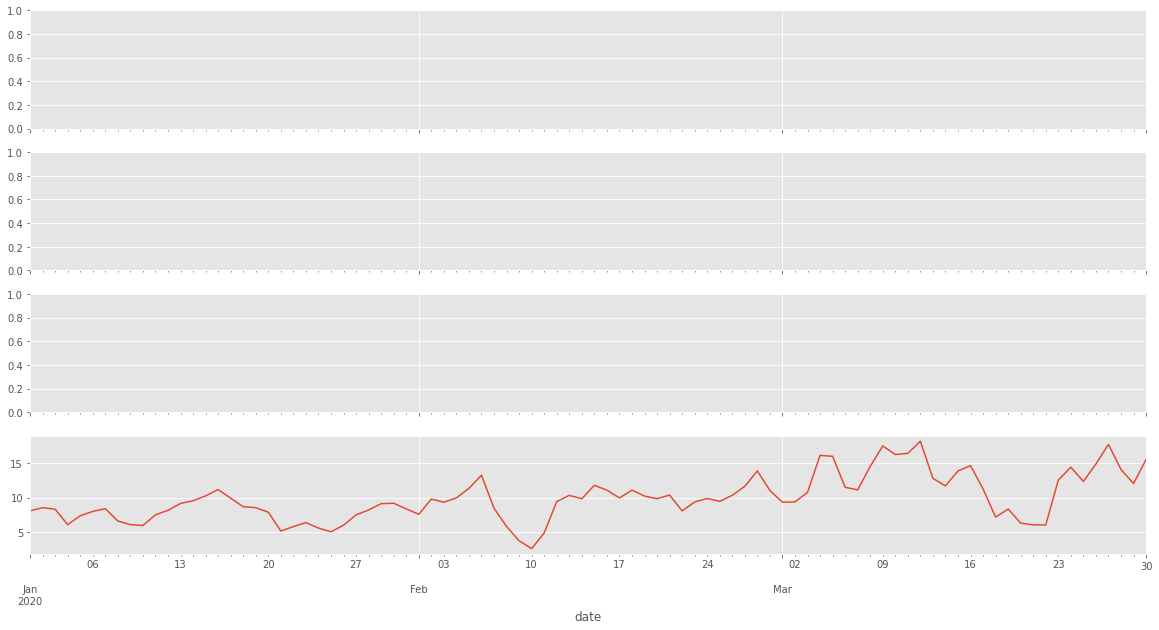

In [19]:
fig, axes= plt.subplots(4,1,sharex=True,figsize=(20,10))
temp_s=data.groupby(data.date)["temp"].mean()
# temp_s.columns="temp"
temp_s[temp_s.index<"2020-3-31"].plot()




<AxesSubplot:xlabel='date'>

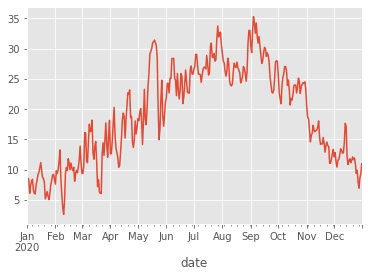

In [20]:
data.groupby(data.date)["temp"].mean().plot()

In [21]:
datadec=pd.read_csv("weatherDec2019.csv")
datadec.head()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
0,1-Dec-2019,00:00,13,6,↑,59,1018,5.0,NaN
1,1-Dec-2019,01:00,13,7,↑,59,1018,5.0,NaN
2,1-Dec-2019,02:00,13,0,↑,63,1017,5.0,NaN
3,1-Dec-2019,03:00,12,7,↑,67,1017,5.0,NaN
4,1-Dec-2019,04:00,12,13,↑,67,1017,5.0,NaN


In [27]:
seasonal=pd.merge(datadec,data,how="outer")
seasonal

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [23]:
seasonal.date=pd.to_datetime(seasonal.date)
seasonal.dtypes

NameError: name 'seasonal' is not defined

In [24]:
begin=pd.to_datetime("2019-12-19")
end=pd.to_datetime("2020-12-21")

In [25]:
# seasonal[(seasonal.date> begin )& (seasonal.date< end)]
seasonal=seasonal.loc[(seasonal.date<end) & (seasonal.date> begin),
~seasonal.columns.isin(["Unnamed: 8" ,"wdirection"]) ]

NameError: name 'seasonal' is not defined

In [26]:
seasonal.groupby("date")["temp"].mean().plot()

NameError: name 'seasonal' is not defined

In [162]:
winter_begin="2019-12-19"
winter_end="2020-12-20"

In [165]:
seasonal.loc[(seasonal.date<winter_end) & (seasonal.date> winter_begin)]

,date,time,temp,wspeed,humidity,pressure,visibility
469,2019-12-20,00:00,7,0.0,71,1030,4.0
470,2019-12-20,01:00,7,0.0,71,1029,4.0
471,2019-12-20,02:00,7,0.0,71,1030,4.0
472,2019-12-20,03:00,6,0.0,76,1029,5.0
473,2019-12-20,04:00,6,4.0,81,1029,5.0
...,...,...,...,...,...,...,...
10754,2020-12-19,19:00,14,0.0,55,1023,5.0
10755,2020-12-19,20:00,10,0.0,76,1024,5.0
10756,2020-12-19,21:00,10,0.0,76,1024,5.0
10757,2020-12-19,22:00,10,0.0,82,1024,5.0


In [214]:
szn=["Winter","Spring","Summer","Fall"]
startdate=seasonal.date.loc[0]
for i in szn:
    exec(f"{i}_begin={seas}")
    exec(f"{i}_end={}")

AttributeError: 'str' object has no attribute 'string'

In [200]:
Winter_end

16

In [253]:
seasonal=seasonal[seasonal.time.str.contains(r":00")]

In [255]:
seasonal.head()

,date,time,temp,wspeed,humidity,pressure,visibility
469,2019-12-20,00:00,7,0.0,71,1030,4.0
470,2019-12-20,01:00,7,0.0,71,1029,4.0
471,2019-12-20,02:00,7,0.0,71,1030,4.0
472,2019-12-20,03:00,6,0.0,76,1029,5.0
473,2019-12-20,04:00,6,4.0,81,1029,5.0


In [334]:
# seasonal=seasonal[seasonal.time.str.replace(r":00")]
seasonal.time=seasonal.time.str.replace(r":.*","",regex=True)

/home/roy/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [347]:
seasonal.time=seasonal.time.astype(int)

In [372]:
seasonal[(seasonal.date=="2020-01-07") & (seasonal.time==0)]

,date,time,temp,wspeed,humidity,pressure,visibility
989,2020-01-07,0,7,6.0,71,1017,16.0
4001,2020-01-07,0,8,4.0,62,1017,6.0


In [371]:
gro=seasonal.groupby("date").count()
gro[gro.time>24]

,time,temp,wspeed,humidity,pressure,visibility
date,,,,,,
2020-01-02,48,48,48,48,48,48
2020-01-03,46,46,46,46,46,46
2020-01-06,48,48,48,48,48,48
2020-01-07,47,47,47,47,47,47


In [328]:
seasonal.date.reset_index().loc[2212]

index                   4316
date     2020-03-18 00:00:00
Name: 2212, dtype: object

In [264]:
seasonal=seasonal.drop_duplicates()

In [316]:
newdate=seasonal[seasonal.date.dt.date<pd.to_datetime("2020-3-20")]

/home/roy/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [318]:
newdate.tail()

,date,time,temp,wspeed,humidity,pressure,visibility
4346,2020-03-19,19:00,8,22.0,82,1013,5.0
4347,2020-03-19,20:00,7,19.0,87,1013,5.0
4348,2020-03-19,21:00,7,22.0,87,1013,5.0
4349,2020-03-19,22:00,7,15.0,87,1014,5.0
4350,2020-03-19,23:00,7,15.0,87,1014,5.0


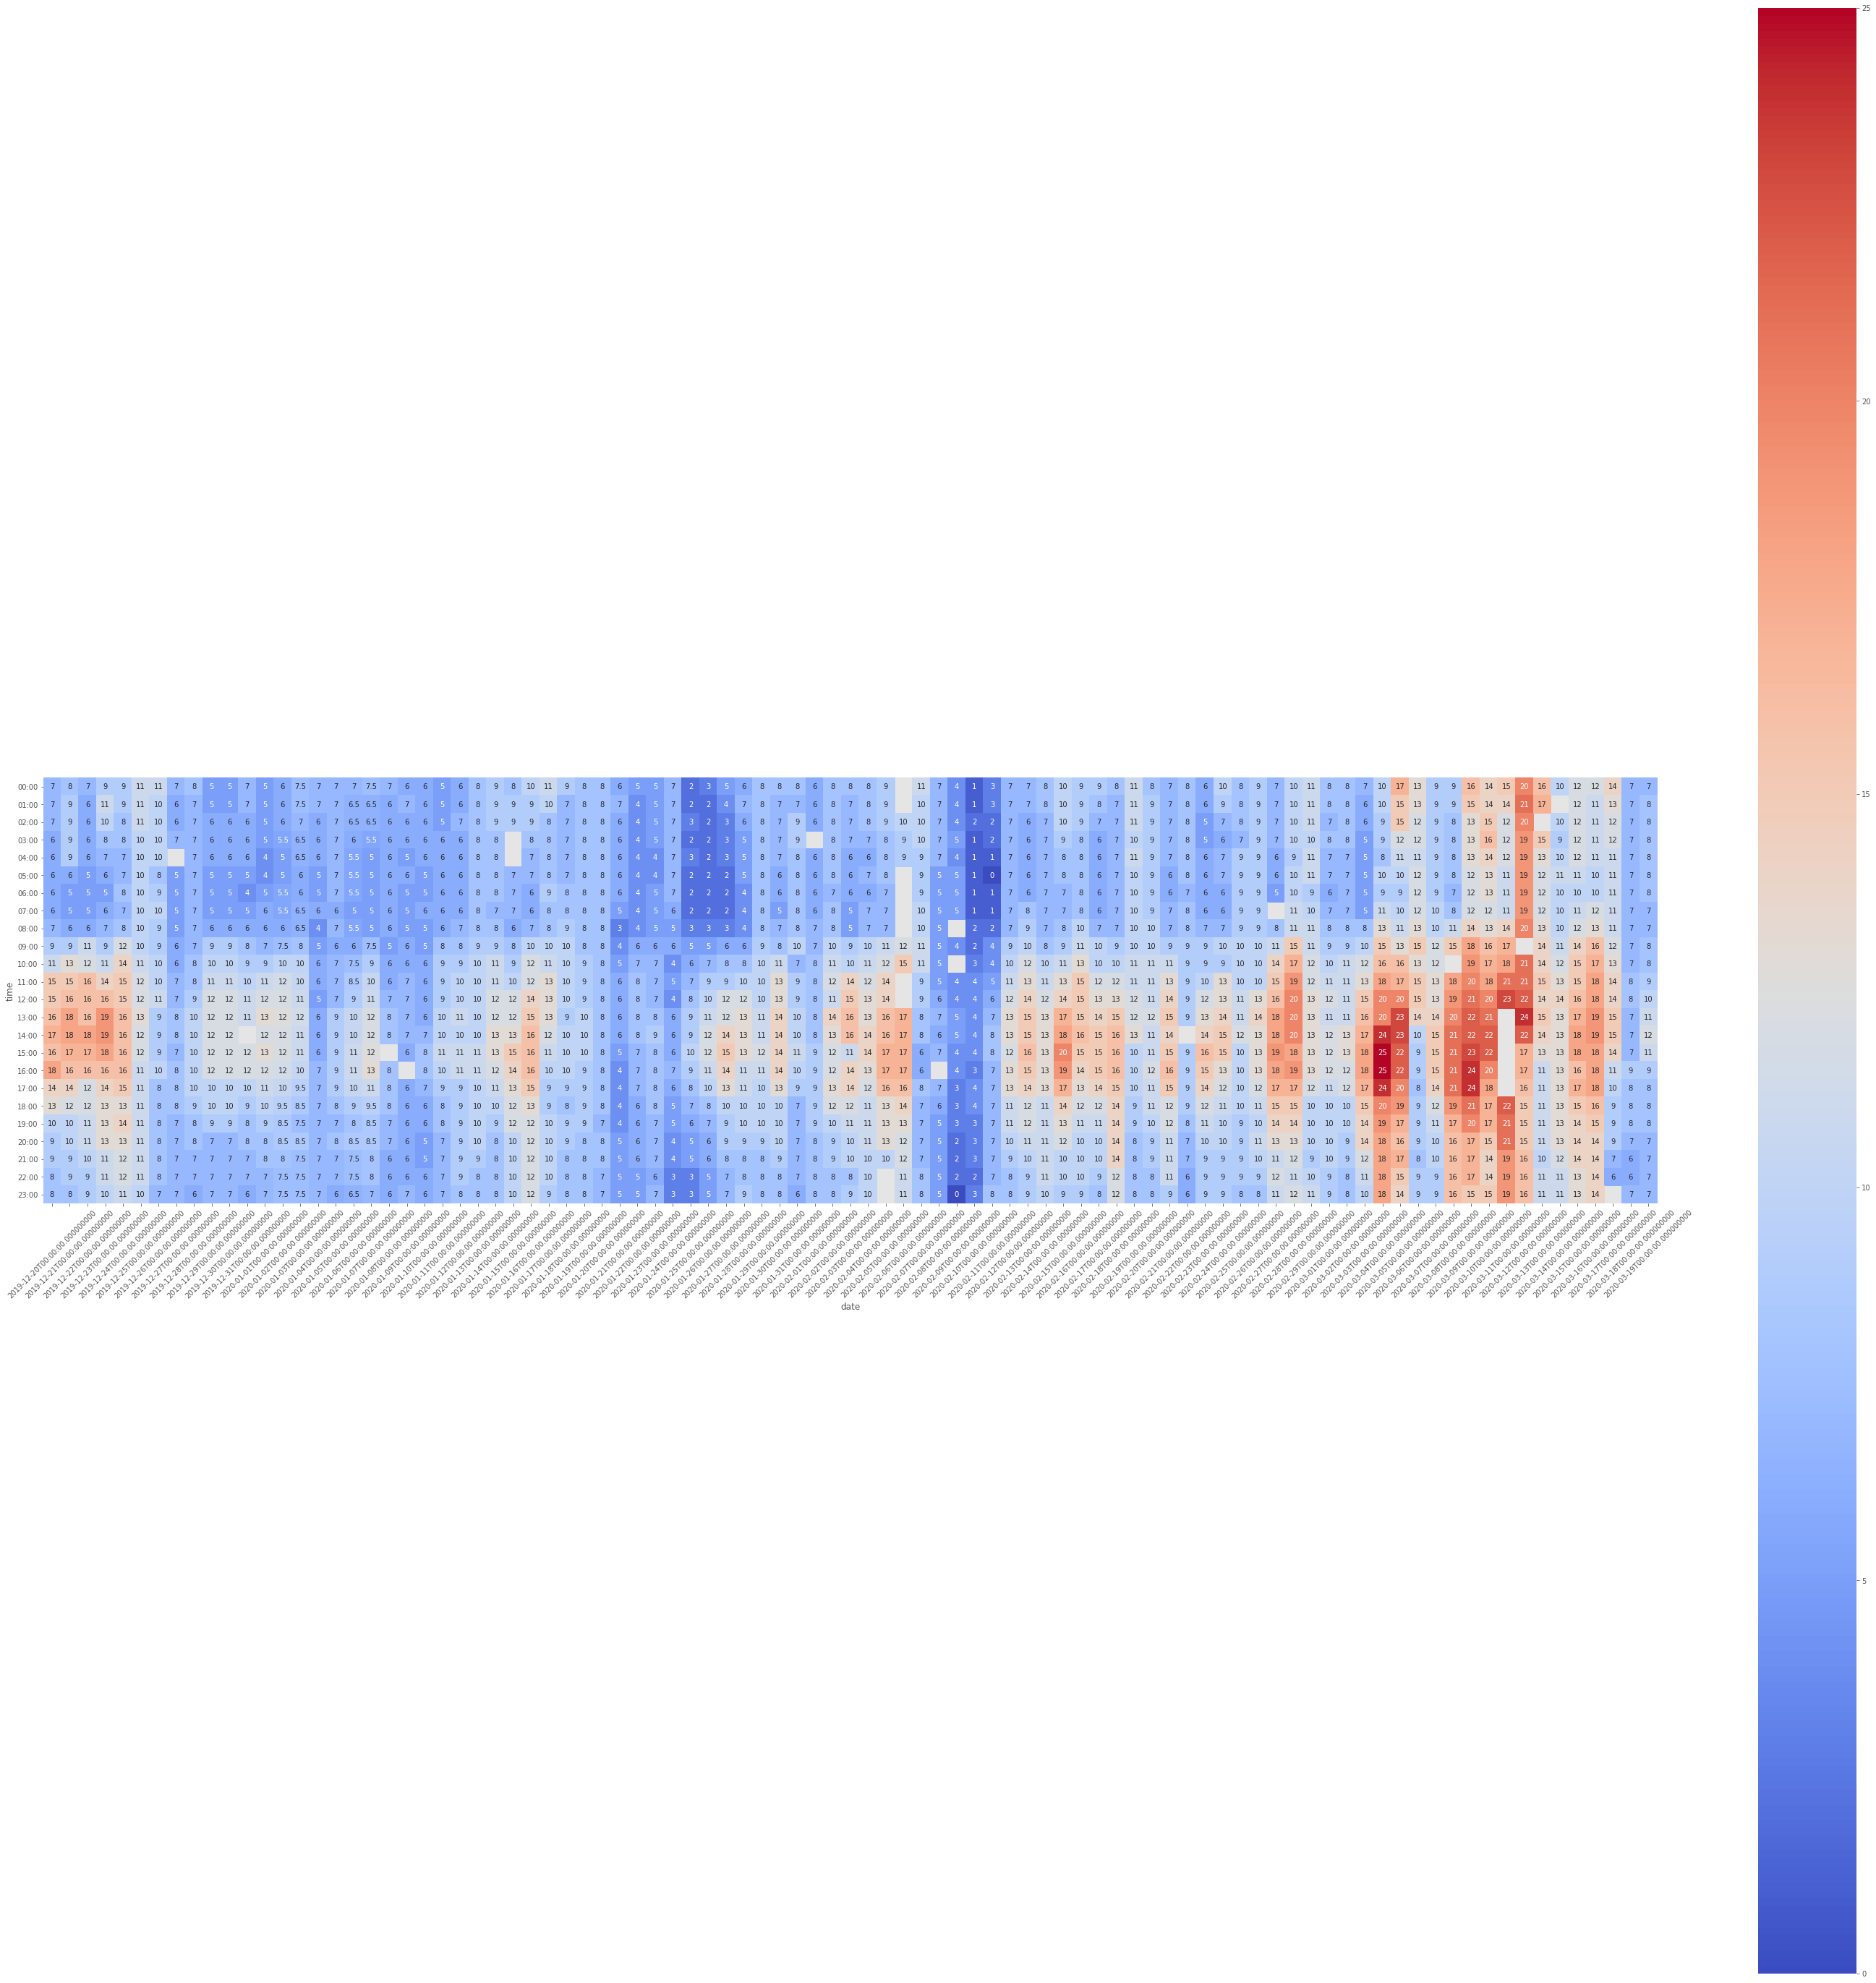

In [319]:
pivot_i=(seasonal.pivot_table(index="time",columns=newdate.date,values="temp"))
# # fill missing values
# pivot_i.fillna(method="bfill",inplace=True)
fig,ax=plt.subplots(figsize=(50,50))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

In [320]:
seasonal.isnull().sum()

date            0
time            0
temp            0
wspeed         10
humidity        0
pressure        0
visibility    242
dtype: int64

In [303]:
sns.heatmap(index="date",columns="time",values="temp",data=seasonal)

TypeError: float() argument must be a string or a number, not 'Timestamp'